In [1]:
# Import of libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [5]:
path_to_file = "/Users/qxzjy/vscworkspace/dse-ft-100/python_module/data/"

In [25]:
# Build and Visualize Dataset
df = pd.read_csv(path_to_file + "km_traveled_all_transportations.csv").iloc[:,1: ]
df.head()

,type_of_transport,Km_traveled
0,uber,34
1,bike,30
2,uber,22
3,bike,17
4,bike,29


In [ ]:
# Aggregation of the dataset, group by one column and mean calcul on the other 
df.groupby("type_of_transport").mean()

,Km_traveled
type_of_transport,
bike,23.125
bus,59.625
car,49.875
uber,40.375


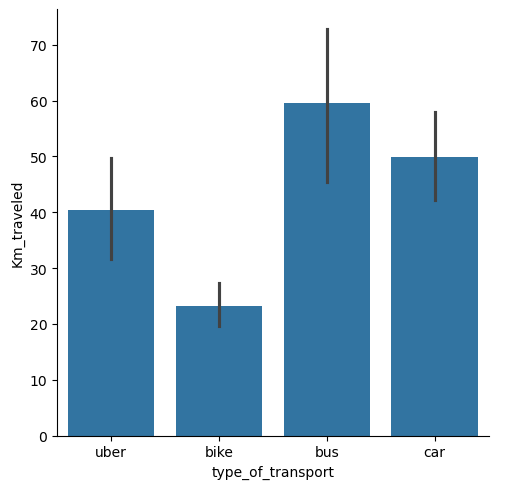

In [11]:
# Visualisation of catplot version : conversion rate with 95% confidence level
sns.catplot(x="type_of_transport", y="Km_traveled", data = df, kind="bar")

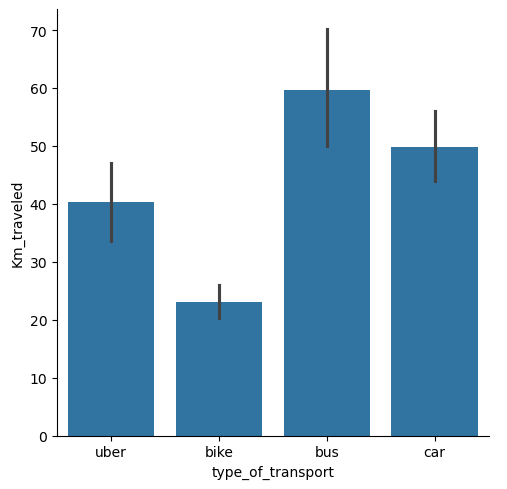

In [ ]:
# Confidence Level (ci = confidence interval) updated from 95% to 85%
sns.catplot(x="type_of_transport", y="Km_traveled", data = df, kind="bar", errorbar=('ci', 85))
# In the grapg, the size of the confidence interval bar reduce

In [27]:
df = pd.read_csv(path_to_file + "km_traveled_per_transport.csv").iloc[:,1:]
print(df)
print("\nn = {} (sample size 'n')".format(len(df)))

   bike  bus  car  uber
0    21   75   55    22
1    30   87   34    34
2    17   49   38    38
3    30   68   66    66
4    24   75   56    56
5    16   33   66    33
6    29   60   44    44
7    18   30   40    30

n = 8 (sample size 'n')


In [22]:
df.describe()

,bike,bus,car,uber
count,8.000000,8.000000,8.000000,8.000000
mean,23.125000,59.625000,49.875000,40.375000
std,5.962682,20.673914,12.586132,14.441384
min,16.000000,30.000000,34.000000,22.000000
25%,17.750000,45.000000,39.500000,32.250000
50%,22.500000,64.000000,49.500000,36.000000
75%,29.250000,75.000000,58.500000,47.000000
max,30.000000,87.000000,66.000000,66.000000


<Axes: >

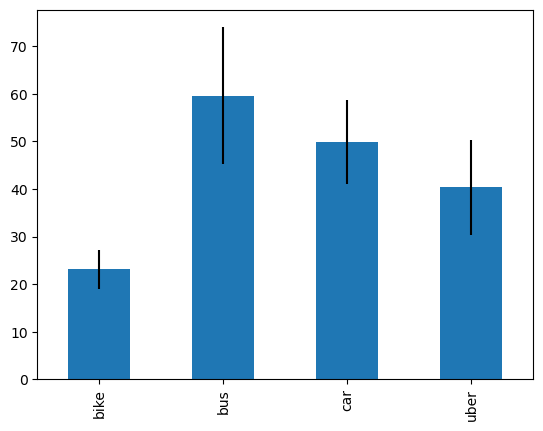

In [ ]:
# With a 90% confidence level
# p-value = 1-0,90 = 0,10
# => z-value, t-value = 1,96 (if in a normal distribution)
t_value = 1.96

# Standard Deviation
sigma = df.std()

# Sample size
n = len(df)

# Margin Error E
# formula : E = t*(m/sqrt(n))
# t : t_value
# m : sigma
# n : n
# using sqrt function from numpy
E = t_value * sigma / np.sqrt(n)

# not using group by, because the dataframe is already sort this way (but by column)
df.mean().plot(yerr=E, kind="bar")